In [6]:
import os
import cv2
import numpy as np

test_data_dir = 'E:/CIFAR-10-images/test'

def load_cifar_10_test_data(test_data_dir):
    images = []

    for root, dirs, files in os.walk(test_data_dir):
        for file in files:
            image = cv2.imread(os.path.join(root, file), cv2.IMREAD_GRAYSCALE)

            image = cv2.resize(image, (32, 32))

            images.append(image)

    images = np.array(images)

    return images

test_images = load_cifar_10_test_data(test_data_dir)

print("Test Images shape:", test_images.shape)

Test Images shape: (10000, 32, 32)


100%|██████████| 1000/1000 [00:02<00:00, 398.90it/s]


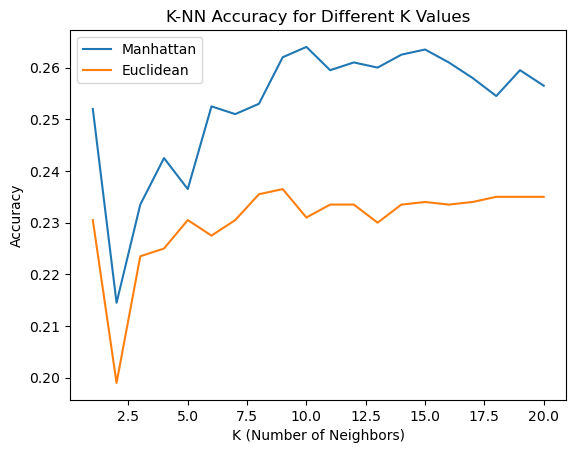

In [1]:
import os
import numpy as np
import random
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

DATA_PATH = r"E:\CIFAR-10-images\test"

Train_data = []
Categories = os.listdir(DATA_PATH)

for c in Categories:
    path = os.path.join(DATA_PATH, c)
    image_paths = os.listdir(path)
    for img in tqdm(image_paths):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        Train_data.append((img_arr, Categories.index(c)))

random.shuffle(Train_data)

images = [item[0] for item in Train_data]
labels = [item[1] for item in Train_data]

images = [image.flatten() for image in images]

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

k_values = range(1, 21)
manhattan_accuracies = []
euclidean_accuracies = []

for k in k_values:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)

    knn_manhattan.fit(X_train, y_train)
    knn_euclidean.fit(X_train, y_train)

    manhattan_accuracy = knn_manhattan.score(X_val, y_val)
    manhattan_accuracies.append(manhattan_accuracy)

    euclidean_accuracy = knn_euclidean.score(X_val, y_val)
    euclidean_accuracies.append(euclidean_accuracy)

plt.plot(k_values, manhattan_accuracies, label='Manhattan')
plt.plot(k_values, euclidean_accuracies, label='Euclidean')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('K-NN Accuracy for Different K Values')
plt.show()